<a href="https://colab.research.google.com/github/Satyake/Getting-Started-with-TF2/blob/main/Accessing_Model_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
tf.keras.models.Model()

In [ ]:
VGG=tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

553476096/553467096 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras.models import Model

In [ ]:
vgg_input=VGG.input
vgg_layers=VGG.layers

In [ ]:
VGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
layer_outputs=[layer.output for layer in vgg_layers]

In [ ]:
layer_outputs

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 28, 28, 256) dtype=float32 (created by layer 'block3_pool')>,


In [ ]:
features=Model(inputs=VGG.input,outputs=layer_outputs)

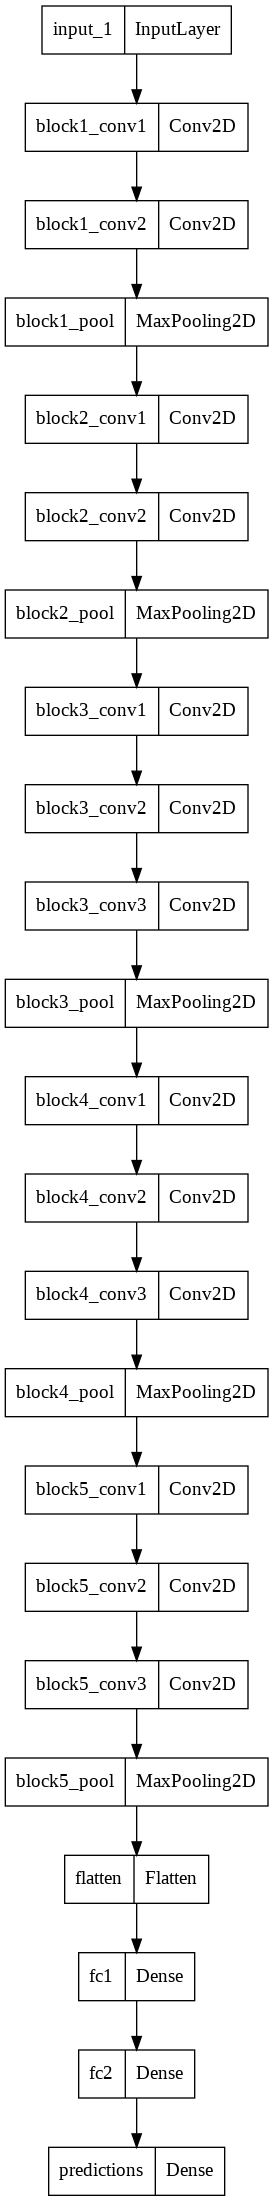

In [ ]:
tf.keras.utils.plot_model(features)

In [ ]:
img='/content/download.jpg'
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [ ]:

img=image.load_img(img,target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
img=preprocess_input(img)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
features_image=features(img)

In [ ]:
features_image[4]

<tf.Tensor: shape=(1, 112, 112, 128), dtype=float32, numpy=
array([[[[   0.       ,    0.       ,  152.04631  , ...,  721.90125  ,
             0.       , 1550.9803   ],
         [   0.       ,    0.       ,  554.75024  , ...,  178.31937  ,
             0.       ,  636.9583   ],
         [   0.       ,    0.       ,  277.46738  , ...,  191.78441  ,
             6.2281423,    0.       ],
         ...,
         [   0.       ,    0.       ,   81.53271  , ...,  157.1767   ,
           145.25142  ,   85.12313  ],
         [   0.       ,    0.       ,  223.21844  , ...,  589.94867  ,
           187.53815  ,  165.56044  ],
         [   0.       ,    0.       ,  363.14053  , ...,  427.94647  ,
           234.55153  ,    0.       ]],

        [[   0.       ,  113.64163  ,   25.78368  , ...,  572.62427  ,
             0.       , 1895.8801   ],
         [   0.       ,   84.413864 ,  600.86926  , ...,  995.8402   ,
           137.80855  ,  456.84833  ],
         [   0.       ,    0.       ,  744.8

In [ ]:
features_image[2].shape

TensorShape([1, 224, 224, 64])

In [ ]:
f1=features_image[5]
print(f1.shape)

(1, 112, 112, 128)


In [ ]:
imgs=f1[0,:,:]

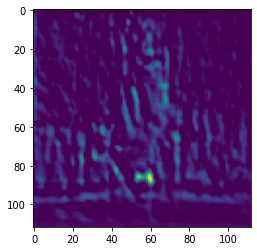

In [ ]:
plt.imshow(imgs[:,:,0]) #RGBs


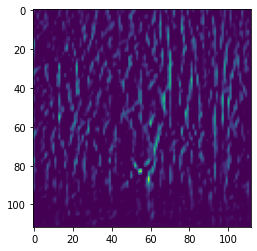

In [ ]:
plt.imshow(imgs[:,:,1])


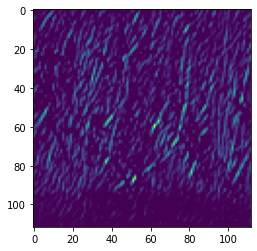

In [ ]:
plt.imshow(imgs[:,:,2])


(112, 112, 128)


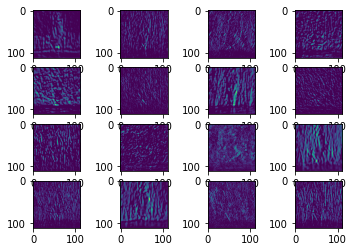

In [ ]:
f2=features_image[5]
imgs=f2[0,:,:]
print(imgs.shape)
#plt.imshow(imgs[:,:,0]) #RGBs
#print(f2.shape)
#plt.imshow(imgs[:,:,61])

for n in range(16):
  ax=plt.subplot(4,4,n+1)
  plt.imshow(imgs[:,:,n])


In [ ]:
extracted_features_block4=Model(inputs=features.input,outputs=features.get_layer('block4_pool').output  )

In [ ]:
img

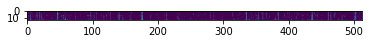

In [ ]:
features_image_blk4=extracted_features_block4(img)
features_image_blk4=features_image_blk4[0]
plt.imshow(features_image_blk4[0,:,:]) #RGBs


In [ ]:
features_image_blk4.shape

TensorShape([1, 14, 14, 512])

TensorShape([14, 14, 512])